### Something about the Data
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Age : Age of patient at time of operation  
#### Year : Patient's year of operation 
#### Nodes : Number of positive axillary nodes detected 
#### Status : Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
Name of the columns Index(['age', 'year', 'nodes', 'status'], dtype='object')
Data types : age       int64
year      int64
nodes     int64
status    int64
dtype: object
Data types : age          int64
year         int64
nodes        int64
status    category
dtype: object
Shape of the data (306, 4)
Number of points :  306
Number of features :  4
Number of classes :  [1, 2]
Categories (2, int64): [1, 2]
Data points per class :  1    225
2     81
Name: status, dtype: int64


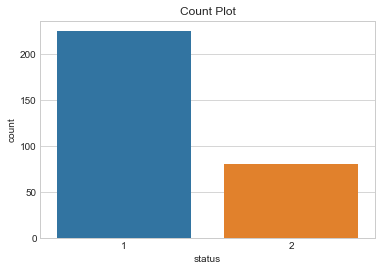

From above results we can conclude that the data is not balanced data.
Missing Values :  age       0
year      0
nodes     0
status    0
dtype: int64
No missing values
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('haberman.csv')
print(df.head())
print("Name of the columns",df.columns)
print("Data types :",df.dtypes)
df["status"] = df["status"].astype('category')
print("Data types :",df.dtypes)
print("Shape of the data",df.shape)
print("Number of points : ",df.shape[0])
print("Number of features : ",df.shape[1])
print("Number of classes : ",df['status'].unique())
print("Data points per class : ",df['status'].value_counts())

plt.title("Count Plot")
sns.countplot(data=df,x="status")
plt.show()
print("From above results we can conclude that the data is not balanced data.")
print("Missing Values : ",df.isnull().sum())
print("No missing values")
print(df.describe())
print(df.info())



# We have observed!

1.All the columns have integer data type.
The last column Status is qualitative variable.So we have changed its data type from integer to category.<br>
2.No missing value is there.<br>
3.The data is imbalanced. <br>
4.Age feature has range of 30-83.<br>

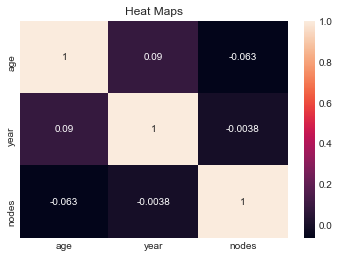

Dist Plots


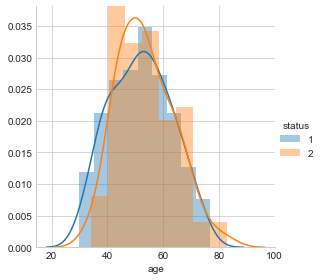

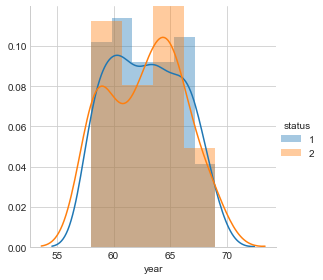

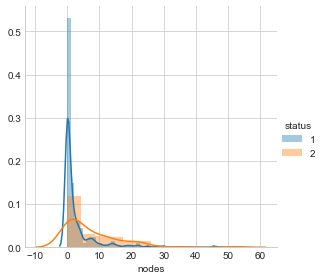

Pair Plots


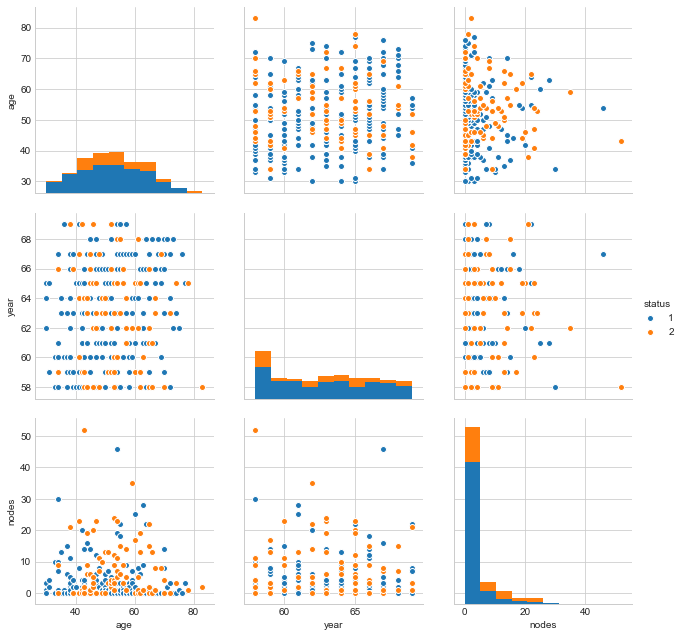

In [0]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Maps")
plt.show()
cls=df.drop(['status'],axis=1)


print("Dist Plots")
for i in cls:
    sns.set_style("whitegrid");
    sns.FacetGrid(df, hue="status", size=4) \
       .map(sns.distplot, i) \
       .add_legend()
    plt.show()
print("Pair Plots")
sns.pairplot(df, hue="status", size=3,vars=["age", "year","nodes"]);
plt.show()    


# We have observed!
1.The mostly co-related feature is nodes.<br>
2.We can also see the same from distplot and pairplot.


age       int32
year      int32
nodes     int32
status    int32
dtype: object
(450, 4)
Missing Values :  age       0
year      0
nodes     0
status    0
dtype: int64
No missing values
              age        year       nodes      status
count  450.000000  450.000000  450.000000  450.000000
mean    52.786667   62.620000    4.333333    1.500000
std     10.468270    3.194518    7.312009    0.500556
min     30.000000   58.000000    0.000000    1.000000
25%     45.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.500000
75%     61.000000   65.000000    5.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
age       450 non-null int32
year      450 non-null int32
nodes     450 non-null int32
status    450 non-null int32
dtypes: int32(4)
memory usage: 7.1 KB
None


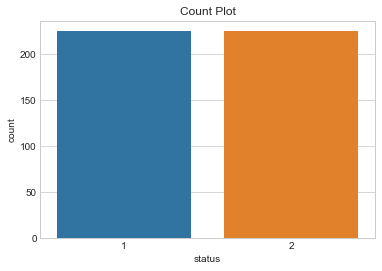

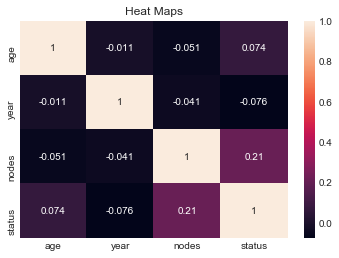

In [0]:
columns=df.columns
sm = SMOTE(random_state=0, n_jobs=8)
x=np.array(df.drop(['status'], axis=1))
X_resampled,y= sm.fit_sample(x,df['status'])
df=pd.DataFrame(X_resampled)
df1=pd.DataFrame(y)
df=pd.concat([df,df1],axis=1)
df.columns=columns

for i in columns:
    df[i] = df[i].astype(int)
print(df.dtypes)
print(df.shape)
print("Missing Values : ",df.isnull().sum())
print("No missing values")
print(df.describe())
print(df.info())
sns.countplot(data=df,x="status")
plt.title("Count Plot")
plt.show()
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Maps")
plt.show()


### Smote 
SMOTE (Synthetic Minority Over-sampling TEchnique) is synthesize new minority classes. It’s the process of creating a new minority classes from the datasets.

1. We get a balanced Dataset. After applying Smote.
2. The maximum co-related feature is nodes.
3. Earlier, the data type was float. We converted it to int.
4. Increase in number of data points. Due to Smote.


# Now we'll do some visualisation on our balanced dataset.


Dist Plots


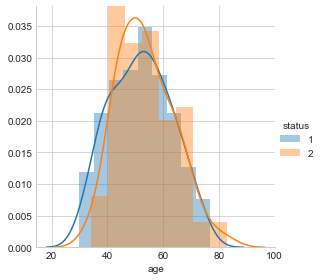

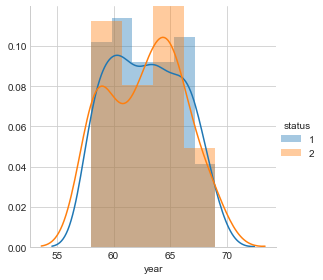

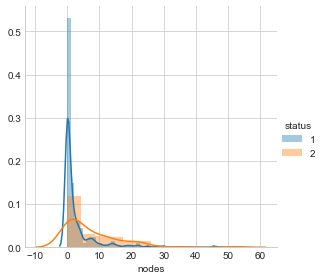

Pair Plots


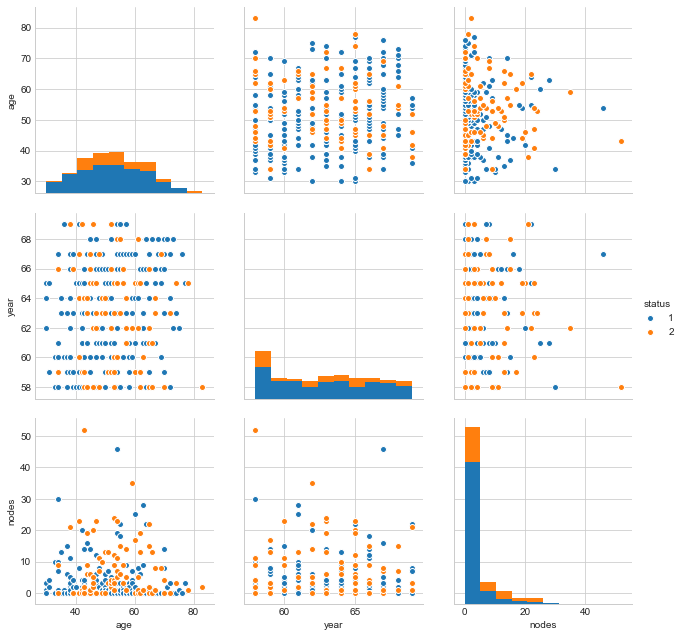

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


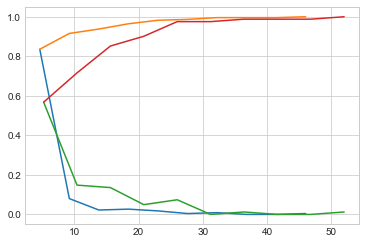

In [0]:
cls=df.drop(['status'],axis=1)
print("Dist Plots")
for i in cls:
    sns.set_style("whitegrid");
    sns.FacetGrid(df, hue="status", size=4) \
       .map(sns.distplot, i) \
       .add_legend();
    plt.show();

print("Pair Plots")
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3,vars=["age", "year","nodes"]);
plt.show()    

df_1 = df.loc[df["status"] == 1]
df_2 = df.loc[df["status"] == 2]


counts, bin_edges = np.histogram(df_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Status : Less than 5 years
counts, bin_edges = np.histogram(df_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()



# We have observed!
1. CDF is also not very useful. They both have almost same CDF.
2. Nodes is the only very useful parameter.